In [6]:
import pandas as pd

# Path to your Parquet gzip file
file_path_11 = '../../1_Data/CLEANED/interventions_dataset.parquet'

# Read the Parquet file into a pandas DataFrame
interventions_dataset = pd.read_parquet(file_path_11, engine='pyarrow')

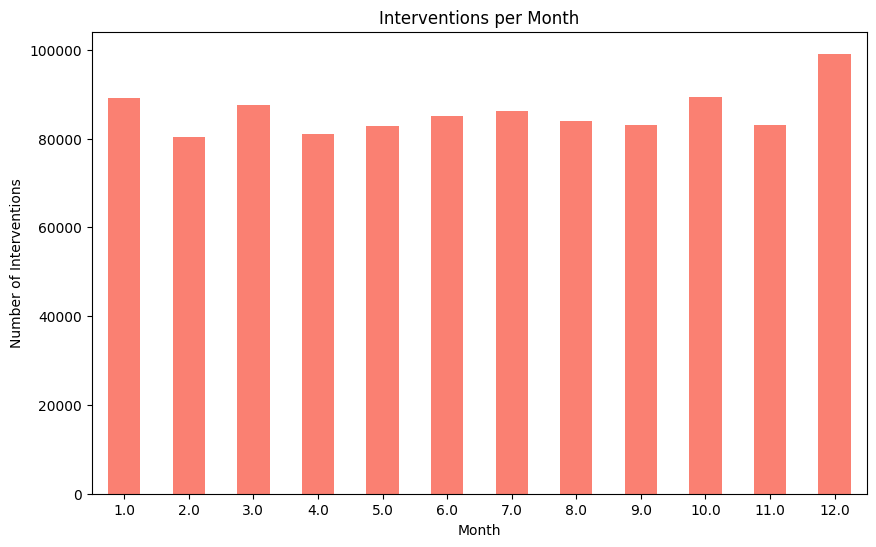

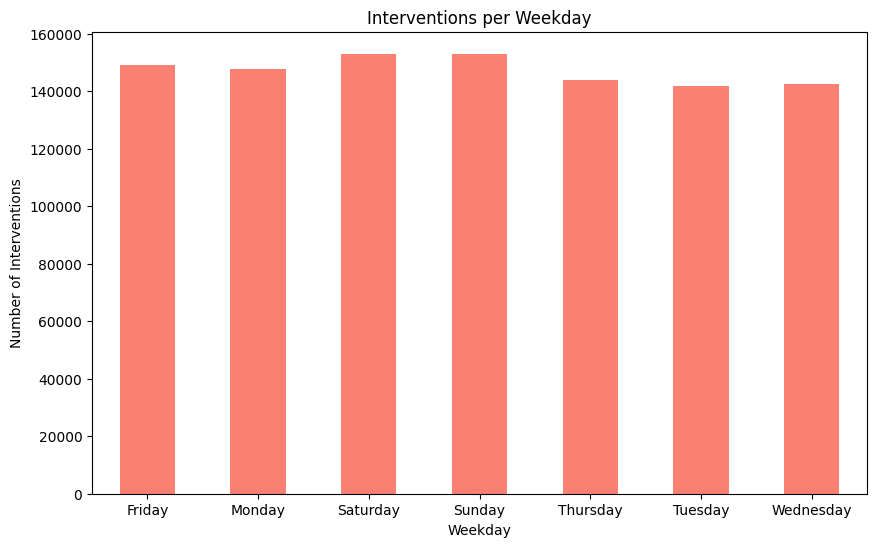

In [3]:
import matplotlib.pyplot as plt

# Plot interventions per month
plt.figure(figsize=(10, 6))
interventions_dataset.groupby(interventions_dataset['t0_Month']).size().plot(kind='bar', color='salmon')
plt.title('Interventions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Interventions')
plt.xticks(rotation=0)
plt.show()

# Plot interventions per weekday
plt.figure(figsize=(10, 6))
interventions_dataset.groupby(interventions_dataset['t0_DayName']).size().plot(kind='bar', color='salmon')
plt.title('Interventions per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Interventions')
plt.xticks(rotation=0)
plt.show()

/var/folders/t3/ph8rkyks35s2z67jf7rffj9w0000gn/T/ipykernel_65615/1244598190.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardiac_arrest_df['t0'] = pd.to_datetime(cardiac_arrest_df['t0'], format='%Y-%m-%d %H:%M:%S.%f')


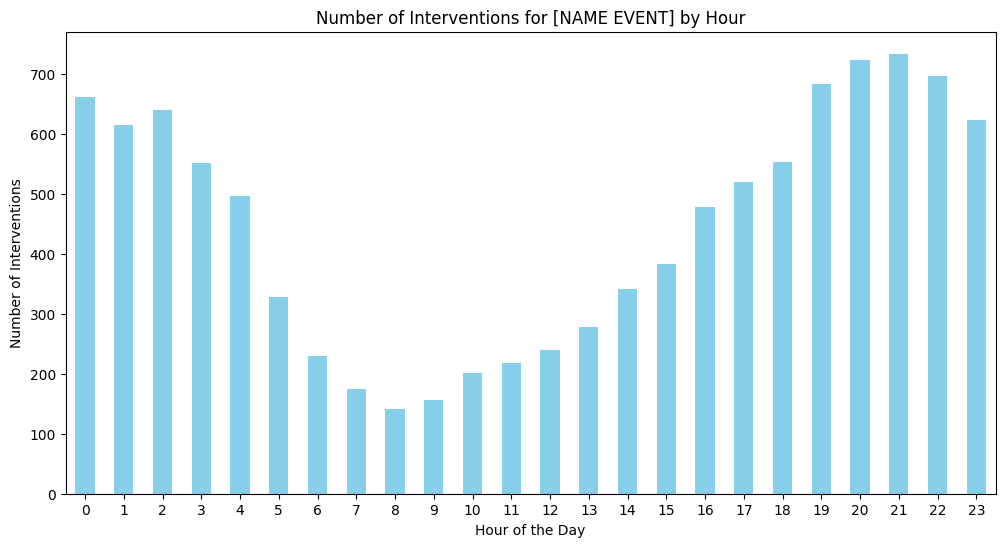

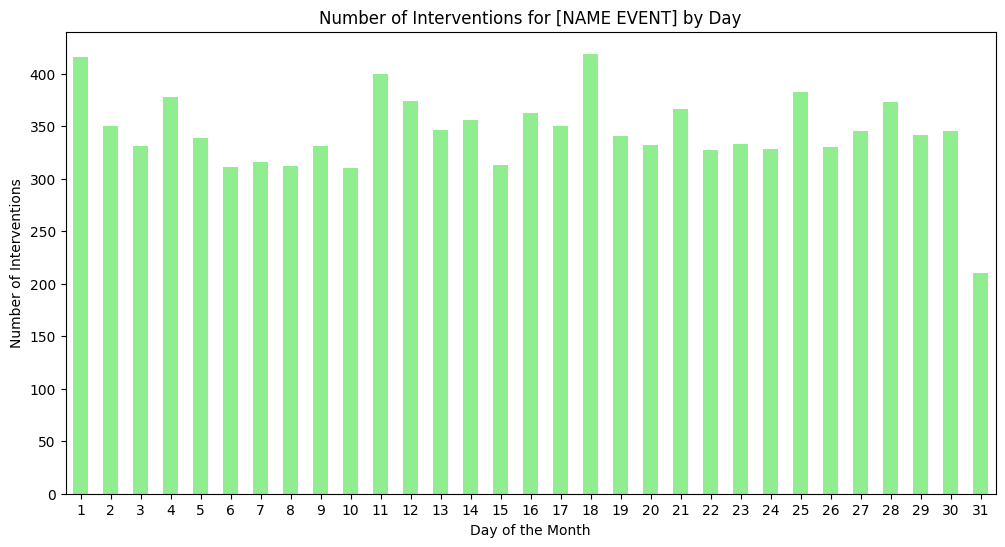

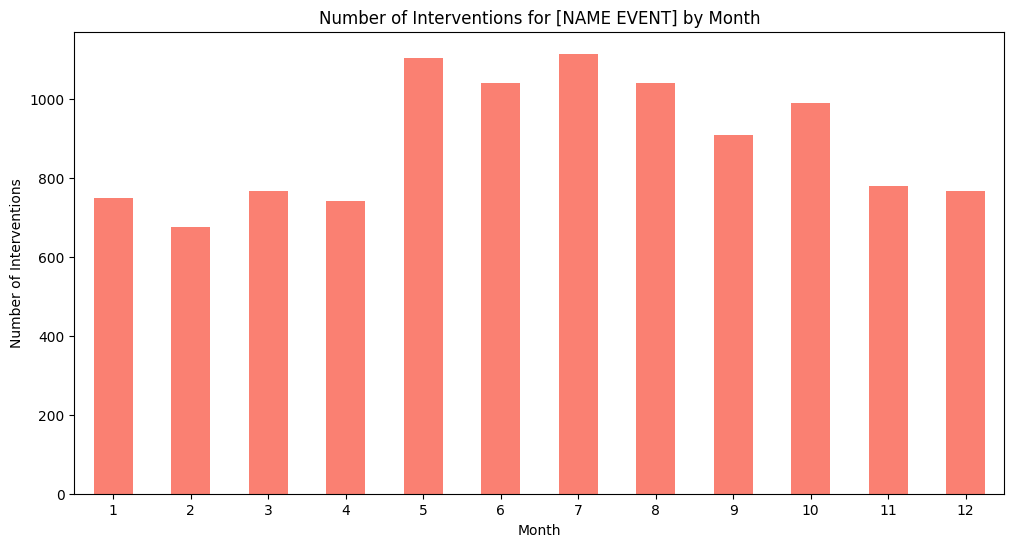

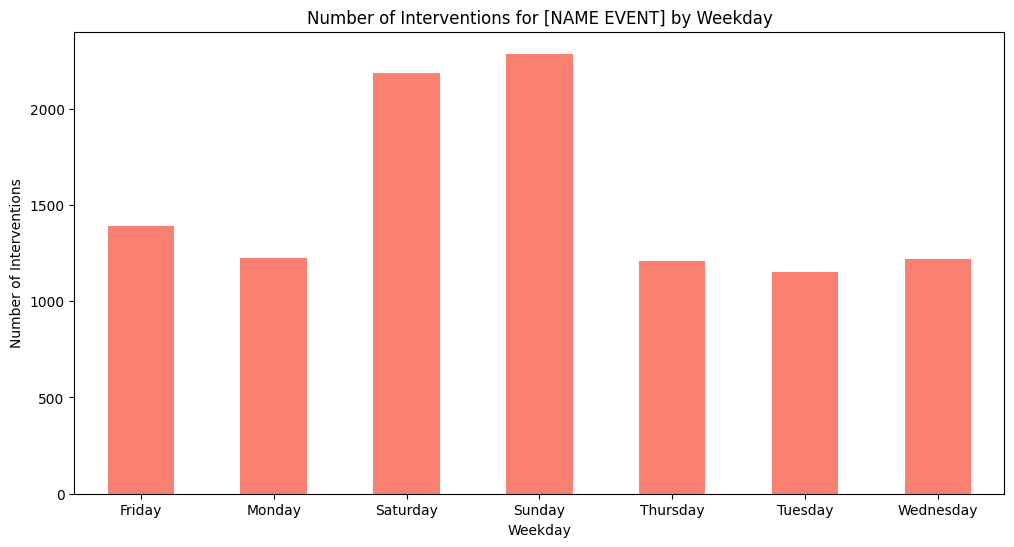

In [8]:
import matplotlib.pyplot as plt

# Filter the dataset for EventType Trip equal to ... 
#P080 - COVID-19 = JUL
#P032 - Allergic reactions = JUL / AUG
#P035 - Convulsions child < 7 years old = DEC
#P001 - Traffic accident = MEI / JUN
#P072 - Sick child < 15 years with fever = DEC
#P073 - Sick child < 15 years with respiratory infection = NOV/DEC
#P036 - Heat stroke - solar stroke = JUL
#P067 - Social problem = DEC
#P091 - MIP pre-alert = DEC
#P002 - Agression - fight - rape ?

#P003 - Cardiac arrest = December
cardiac_arrest_df = interventions_dataset[interventions_dataset['eventtype_trip'] == 'P002 - Agression - fight - rape']

# Convert T0 to datetime format
cardiac_arrest_df['t0'] = pd.to_datetime(cardiac_arrest_df['t0'], format='%Y-%m-%d %H:%M:%S.%f')

# Plot the number of interventions for each hour
plt.figure(figsize=(12, 6))
cardiac_arrest_df.groupby(cardiac_arrest_df['t0'].dt.hour).size().plot(kind='bar', color='skyblue')
plt.title('Number of Interventions for [NAME EVENT] by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Interventions')
plt.xticks(rotation=0)
plt.show()

# Plot the number of interventions for each day
plt.figure(figsize=(12, 6))
cardiac_arrest_df.groupby(cardiac_arrest_df['t0'].dt.day).size().plot(kind='bar', color='lightgreen')
plt.title('Number of Interventions for [NAME EVENT] by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Interventions')
plt.xticks(rotation=0)
plt.show()

# Plot the number of interventions for each month
plt.figure(figsize=(12, 6))
cardiac_arrest_df.groupby(cardiac_arrest_df['t0'].dt.month).size().plot(kind='bar', color='salmon')
plt.title('Number of Interventions for [NAME EVENT] by Month')
plt.xlabel('Month')
plt.ylabel('Number of Interventions')
plt.xticks(rotation=0)
plt.show()

# Plot interventions per weekday
plt.figure(figsize=(12, 6))
cardiac_arrest_df.groupby(cardiac_arrest_df['t0'].dt.day_name()).size().plot(kind='bar', color='salmon')
plt.title('Number of Interventions for [NAME EVENT] by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Interventions')
plt.xticks(rotation=0)
plt.show()

In [9]:
import pandas as pd
import plotly.express as px

# Define the order of months and days
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by month and weekday, and count occurrences
grouped = interventions_dataset.groupby([interventions_dataset['t0'].dt.month_name(), interventions_dataset['t0'].dt.day_name()]).size().unstack().fillna(0)

# Flatten the DataFrame to have a single index
grouped_flat = grouped.reset_index()

# Melt the DataFrame to long format
melted = pd.melt(grouped_flat, id_vars='t0', value_vars=grouped_flat.columns[1:], var_name='Weekday', value_name='Count')

# Create the bar plot
fig = px.bar(melted, x='t0', y='Count', color='Weekday', barmode='stack', text='Count',
             category_orders={'t0': month_order, 'Weekday': day_order})

# Update layout
fig.update_layout(
    title='Number of Interventions by Month and Weekday',
    xaxis_title='Month',
    yaxis_title='Number of Interventions'
)

# Show the figure
fig.show()

In [20]:
import pandas as pd
import plotly.express as px

# Define the order of months and days
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Function to plot interventions for a specific event type
def plot_interventions(event_type):
    # Filter the dataset based on the selected event type
    filtered_df = interventions_dataset[interventions_dataset['eventtype_trip'] == event_type]
    
    # Group by month and weekday, and count occurrences
    grouped = filtered_df.groupby([filtered_df['t0'].dt.month_name(), filtered_df['t0'].dt.day_name()]).size().unstack().fillna(0)

    # Flatten the DataFrame to have a single index
    grouped_flat = grouped.reset_index()

    # Melt the DataFrame to long format
    melted = pd.melt(grouped_flat, id_vars='t0', value_vars=grouped_flat.columns[1:], var_name='Weekday', value_name='Count')

    # Create the bar plot
    fig = px.bar(melted, x='t0', y='Count', color='Weekday', barmode='stack', text='Count',
                 category_orders={'t0': month_order, 'Weekday': day_order})

    # Update layout
    fig.update_layout(
        title=f'Number of Interventions for {event_type} by Month and Weekday',
        xaxis_title='Month',
        yaxis_title='Number of Interventions'
    )

    # Show the figure
    fig.show()

# Select an event type from the dropdown menu
#selected_event_type = "P032 - Allergic reactions"
selected_event_type = "P002 - Agression - fight - rape"

plot_interventions(selected_event_type)


In [7]:
import pandas as pd
import plotly.graph_objects as go

# Assuming interventions_dataset is your DataFrame
# Convert columns t0, t1, t2, t3, t4, t5, t6, t7 to datetime format with UTC timezone
interventions_dataset[['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7']] = interventions_dataset[['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

# Calculate the time differences in minutes
interventions_dataset['T0 -> T1'] = (interventions_dataset['t1'] - interventions_dataset['t0']).dt.total_seconds() / 60
interventions_dataset['T1 -> T2'] = interventions_dataset['T0 -> T1'] + (interventions_dataset['t2'] - interventions_dataset['t1']).dt.total_seconds() / 60
interventions_dataset['T2 -> T3'] = interventions_dataset['T1 -> T2'] + (interventions_dataset['t3'] - interventions_dataset['t2']).dt.total_seconds() / 60
interventions_dataset['T3 -> T4'] = interventions_dataset['T2 -> T3'] + (interventions_dataset['t4'] - interventions_dataset['t3']).dt.total_seconds() / 60
interventions_dataset['T4 -> T5'] = interventions_dataset['T3 -> T4'] + (interventions_dataset['t5'] - interventions_dataset['t4']).dt.total_seconds() / 60
interventions_dataset['T5 -> T6'] = interventions_dataset['T4 -> T5'] + (interventions_dataset['t6'] - interventions_dataset['t5']).dt.total_seconds() / 60
interventions_dataset['T6 -> T7'] = interventions_dataset['T5 -> T6'] + (interventions_dataset['t7'] - interventions_dataset['t6']).dt.total_seconds() / 60

# Group by vector type and calculate the mean time differences for each group
grouped = interventions_dataset.groupby('vector_type').mean()

# Create traces for each vector type
data = []
for vector_type, row in grouped.iterrows():
    trace = go.Bar(x=['T0 -> T1', 'T1 -> T2', 'T2 -> T3', 'T3 -> T4', 'T4 -> T5', 'T5 -> T6', 'T6 -> T7'],
                   y=row[['T0 -> T1', 'T1 -> T2', 'T2 -> T3', 'T3 -> T4', 'T4 -> T5', 'T5 -> T6', 'T6 -> T7']],
                   name=vector_type)
    data.append(trace)

# Create layout
layout = go.Layout(title='Average Time Differences by Vector Type',
                   xaxis=dict(title='t Columns'),
                   yaxis=dict(title='Average Time Difference (minutes)'),
                   barmode='group',  # Add barmode to group bars
                   legend=dict(title='Vector Type'))

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()


/var/folders/t3/ph8rkyks35s2z67jf7rffj9w0000gn/T/ipykernel_30675/1077871780.py:18: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [24]:
filtered_df = interventions_dataset[interventions_dataset['vector_type'] == 'Ambulance Disaster']
filtered_df[['eventtype_trip']].head(30)

,eventtype_trip
162383,P033 - Trauma
162552,P033 - Trauma
167897,P033 - Trauma
168249,P033 - Trauma
168396,P033 - Trauma
168469,P033 - Trauma
168475,P033 - Trauma
168498,P033 - Trauma
168567,P033 - Trauma
168777,P033 - Trauma


In [5]:
import plotly.express as px

# Assuming interventions_dataset is your DataFrame

# Calculate the difference between t7 and t0 in minutes
interventions_dataset['t7_t0_diff_minutes'] = (interventions_dataset['t7'] - interventions_dataset['t0']).dt.total_seconds() / 60

# Filter out missing values in 't7_t0_diff_minutes' column
interventions_dataset_filtered = interventions_dataset.dropna(subset=['t7_t0_diff_minutes'])

# Aggregate the data by taking the mean of t7_t0_diff_minutes for each combination of province_intervention and vector_type
aggregated_data = interventions_dataset_filtered.groupby(['province_intervention', 'vector_type']).agg({'t7_t0_diff_minutes': 'mean'}).reset_index()

# Create boxplot
fig = px.bar(aggregated_data, x='province_intervention', y='t7_t0_diff_minutes', color='vector_type',
             title='Mean of t7 - t0 per Province and Vector Type',
             labels={'t7_t0_diff_minutes': 'Mean t7 - t0 (minutes)', 'province_intervention': 'Province Intervention', 'vector_type': 'Vector Type'})

# Show the plot
fig.show()
